In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
HappinessData=pd.read_excel('..\WHRDATA\WHR2015-21.xlsx') # Import HappinessData

In [5]:
len(HappinessData) 

1084

In [28]:
HappinessData.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [29]:
CountryList=[x for x in HappinessData['Country'].unique()] #CreateList of Countires with HappinessData
len(CountryList)

166

In [30]:
WHRYears=[x for x in HappinessData['Year'].unique()] #CreateList of Years with HappinessData
WHRYears

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [31]:
CPIData=pd.read_csv('UN_Consumer Price Index.csv',skiprows=1) #Import csv file
CPIData.columns=['Region','Country','Year','Type','Value','Footnotes','Source'] #Provide header/columns to DataFrame
len(CPIData)

2062

In [32]:
CPIData.head()

,Region,Country,Year,Type,Value,Footnotes,Source
0,4,Afghanistan,2005,Consumer price index: General,71.5821,NaN,"United Nations Statistics Division (UNSD), New..."
1,4,Afghanistan,2010,Consumer price index: General,100.0000,NaN,"United Nations Statistics Division (UNSD), New..."
2,4,Afghanistan,2015,Consumer price index: General,132.8832,NaN,"United Nations Statistics Division (UNSD), New..."
3,4,Afghanistan,2017,Consumer price index: General,145.6107,NaN,"United Nations Statistics Division (UNSD), New..."
4,4,Afghanistan,2015,Consumer price index: Food,100.8219,Estimate.,"United Nations Statistics Division (UNSD), New..."


In [33]:
CPIData['Country'].sort_values().unique() #List Unique Countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Curaçao', 'Cyprus', 'Czechia', 'Côte d’Ivoire',
       'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Fren

In [34]:
#Cleanup Country Names,replace as per Happiness Data Country Names
CPIData.replace('Bolivia (Plurin. State of)','Bolivia',inplace=True)
CPIData.replace(['China, Hong Kong SAR', 'China, Macao SAR'],'Hong Kong',inplace=True)
CPIData.replace('Congo','Congo (Brazzaville)',inplace=True)
CPIData.replace('Dem. Rep. of the Congo','Congo (Kinshasa)',inplace=True)
CPIData.replace('Iran (Islamic Republic of)','Iran',inplace=True)

In [35]:
#Cleanup Country Names,replace as per Happiness Data Country Names
CPIData.replace("Lao People's Dem. Rep.","Laos",inplace=True)
CPIData.replace("Republic of Moldova","Moldova",inplace=True)
CPIData.replace("Russian Federation","Russia",inplace=True)
CPIData.replace("State of Palestine","Palestinian Territories",inplace=True)
CPIData.replace("Syrian Arab Republic","Syria",inplace=True)
CPIData.replace("United Rep. of Tanzania","Tanzania",inplace=True)
CPIData.replace("Venezuela (Boliv. Rep. of)","Venezuela",inplace=True)
CPIData.replace("Viet Nam","Vietnam",inplace=True)

In [36]:
#Filter CPI data for Countires and Years in Happiness Data
CPIData=CPIData[(CPIData['Country'].isin(CountryList))&(CPIData['Year'].isin(WHRYears))]

In [37]:
len(CPIData)

1034

In [38]:
#Only Analyze Consumer Food Prices
CPIData=CPIData[CPIData['Type']=='Consumer price index: Food']

In [39]:
len(CPIData)

482

In [40]:
CPIData=CPIData[['Country','Year','Value']] #Consider only Country Year and CPI values.

In [41]:
CPIData.reset_index(drop=True,inplace=True) # Reset Index

In [42]:
CPIData.head()

,Country,Year,Value
0,Afghanistan,2015,100.8219
1,Afghanistan,2017,113.9270
2,Albania,2015,118.8192
3,Albania,2017,127.3438
4,Albania,2018,130.7555


In [43]:
list(CPIData['Year'].unique()) #Unique Years for Which CPI data is available

[2015, 2017, 2018, 2019]

In [44]:
#Restrict Happines Data to the years for which CPI data is available
#Consider Country,Year and Rank columns only
HappinessData=HappinessData[HappinessData['Year'].isin(list(CPIData['Year'].unique()))][['Country','Year','Rank','Score']]
len(HappinessData)

625

In [45]:
HappinessData.head()

,Country,Year,Rank,Score
0,Switzerland,2015,1,7.587
1,Iceland,2015,2,7.561
2,Denmark,2015,3,7.527
3,Norway,2015,4,7.522
4,Canada,2015,5,7.427


In [70]:
#Merge Happiness Data with CPI data based on Country and Year
CombineData= pd.merge(CPIData,HappinessData,on=['Country','Year']) #Merge both the DataFrames on COuntry and Year
CombineData.head()

,Country,Year,Value,Rank,Score
0,Afghanistan,2015,100.8219,153,3.575
1,Afghanistan,2017,113.9270,141,3.794
2,Albania,2015,118.8192,95,4.959
3,Albania,2017,127.3438,109,4.644
4,Albania,2018,130.7555,112,4.586


In [71]:
len(CombineData)

464

In [72]:
#Calculate relation between Happiness Rank and Food Price index
model=linregress(CombineData['Rank'],CombineData['Value'])
model

LinregressResult(slope=2.114845814440782, intercept=90.16281028250503, rvalue=0.05530988360431994, pvalue=0.23439711195968949, stderr=1.7761910050624654, intercept_stderr=148.40363207800772)

The r-value is: 0.003001334474343152


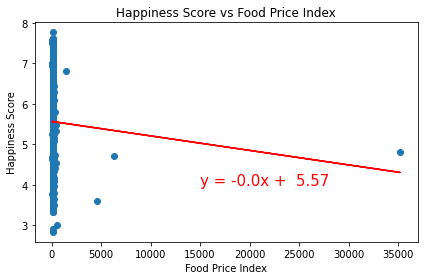

In [76]:
model=linregress(CombineData['Value'],CombineData['Score'])
regressvalues=CombineData['Value']*model[0]+model[1] #Calculate Linear Regression
line_eq= f"y = {str(round(model[0],2))}x +  {str(round(model[1],2))}"
print(f"The r-value is: {model[2]**2}") #Print Rvalue
plt.title('Happiness Score vs Food Price Index')
plt.scatter(CombineData['Value'],CombineData['Score'])
plt.ylabel('Happiness Score')
plt.xlabel('Food Price Index')
plt.plot(CombineData['Value'],regressvalues,'red')
plt.annotate(line_eq,(15000,4),fontsize=15,color='red')
plt.tight_layout()
plt.show()

In [77]:
#Removing Outliers
CombineData=CombineData[CombineData['Value']<800]

The r-value is: 0.08086145498967384


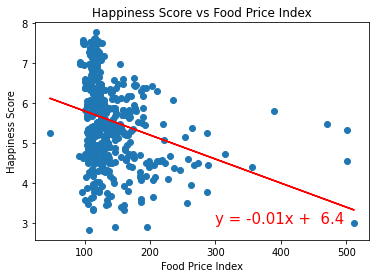

In [78]:
model=linregress(CombineData['Value'],CombineData['Score'])
regressvalues=CombineData['Value']*model[0]+model[1] #Calculate Linear Regression
line_eq= f"y = {str(round(model[0],2))}x +  {str(round(model[1],2))}"
print(f"The r-value is: {model[2]**2}") #Print Rvalue
plt.title('Happiness Score vs Food Price Index')
plt.scatter(CombineData['Value'],CombineData['Score'])
plt.ylabel('Happiness Score')
plt.xlabel('Food Price Index')
plt.plot(CombineData['Value'],regressvalues,'red')
plt.annotate(line_eq,(300,3),fontsize=15,color='red')
#plt.tight_layout()
plt.show()

In [79]:
# Top 10 Ranks by Happiness Index
TopRanks=pd.DataFrame({'Ranks':CombineData.sort_values('Rank')['Rank'].unique()}).head(10)['Ranks']
# Bottom 10 Ranks by Happiness Index
BottomRanks=pd.DataFrame({'Ranks':CombineData.sort_values('Rank',ascending=False)['Rank'].unique()}).head(10)['Ranks']

In [80]:
#Data of countries at top of Happiniess Index Rank
TopCombinedData=CombineData[CombineData['Rank'].isin(TopRanks)]
#Data of countries at Bottom of Happiniess Index Rank
BottomCombinedData=CombineData[CombineData['Rank'].isin(BottomRanks)]

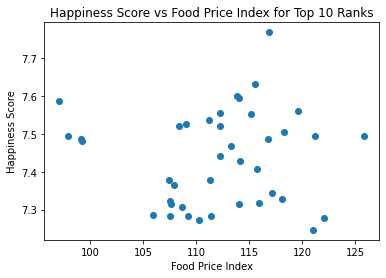

In [83]:
plt.scatter(TopCombinedData['Value'],TopCombinedData['Score'])
plt.title('Happiness Score vs Food Price Index for Top 10 Ranks')
plt.ylabel('Happiness Score')
plt.xlabel('Food Price Index')
plt.show()

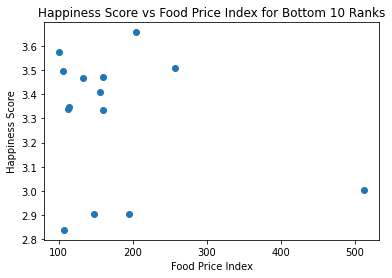

In [84]:
plt.scatter(BottomCombinedData['Value'],BottomCombinedData['Score'])
plt.title('Happiness Score vs Food Price Index for Bottom 10 Ranks')
plt.ylabel('Happiness Score')
plt.xlabel('Food Price Index')
plt.show()